In [1]:
%matplotlib inline
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

EXPERIMENTS_DIR = '../data/experiments/*.csv'

# Load data

In [4]:
def name(fname):
    return fname[-7:-4]

def read():
    fnames = glob.glob(EXPERIMENTS_DIR)
    dfs = []
    for fname in fnames:
        df = pd.read_csv(fname)
        df['language'] = name(fname)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True, sort=False)

results = read()
results.head()

,uid,type,pos,number,gender,case,person,masked,other_masked,num_distractors,correct,incorrect,distance,right,language
0,dev-s1,modifying,ADJ,NO VALUE,NO VALUE,Nom,NO VALUE,En ons hoop hierdie keer dat [MASK] pogings de...,En ons hoop hierdie keer dat hernude [MASK] de...,12,3.967679,0.0,3,True,afr
1,dev-s1,modifying,ADJ,NO VALUE,NO VALUE,Nom,NO VALUE,En ons hoop hierdie keer dat hernude pogings d...,En ons hoop hierdie keer dat hernude pogings d...,12,4.889715,0.0,2,True,afr
2,dev-s1,modifying,ADJ,NO VALUE,NO VALUE,Nom,NO VALUE,En ons hoop hierdie keer dat hernude pogings d...,En ons hoop hierdie keer dat hernude pogings d...,12,4.173031,0.0,2,True,afr
3,dev-s1,modifying,ADJ,NO VALUE,NO VALUE,Nom,NO VALUE,En ons hoop hierdie keer dat hernude pogings d...,En ons hoop hierdie keer dat hernude pogings d...,12,4.892605,0.0,4,True,afr
4,dev-s2,modifying,ADJ,NO VALUE,NO VALUE,Nom,NO VALUE,Ons [MASK] gelukwensing gaan aan die Regering ...,Ons spesiale [MASK] gaan aan die Regering en m...,7,4.339762,0.0,3,True,afr


# Summary

In [9]:
results['language'].value_counts()

cat    94541
ita    86250
deu    51205
hrv    21817
bul    20168
nld     9903
dan     8803
eng     7641
eus     4152
afr     2440
bel     1051
hye      370
bre       91
Name: language, dtype: int64

In [114]:
results['type'].value_counts()

determiner    154865
modifying      91854
verb           57234
predicated      4479
Name: type, dtype: int64

# Overall results

95.5% accuracy

In [6]:
results['right'].value_counts(normalize=True)

True     0.955225
False    0.044775
Name: right, dtype: float64

# Results by type

This is perhaps an unfair comparison because it depends on the makeup of the corpus used (e.g. number of distractors, other factors that we don't know about).

- Which types does BERT perform the best at?
    - Determiner
    - Modofying
- Which types does BERT perform the worst at?
    - Predicated
    - Verb

In [23]:
by_type = results.groupby('type')['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
by_type[by_type['right'] == True]

,type,right,accuracy
0,determiner,True,0.979350
2,modifying,True,0.948919
4,predicated,True,0.858004
6,verb,True,0.907677


# Results by language

This is perhaps an unfair comparison because it depends on the makeup of the corpus used (e.g. number of distractors, other factors that we don't know about).

- Which languages does BERT perform the best at?
    - Afrikaans
    - German
- Which languages does BERT perform the worst at?
    - hye
    - Breton

In [22]:
by_lang = results.groupby('language')['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
by_lang[by_lang['right'] == True].sort_values(by='accuracy', ascending=False)

,language,right,accuracy
0,afr,True,0.999590
12,deu,True,0.983615
8,cat,True,0.979649
22,ita,True,0.978771
18,hrv,True,0.971307
14,eng,True,0.876063
6,bul,True,0.871232
10,dan,True,0.843462
24,nld,True,0.780269
16,eus,True,0.768786


# Results by language and type

This is perhaps an unfair comparison because it depends on the makeup of the corpus used (e.g. number of distractors, other factors that we don't know about).

- Which language and type combination does BERT perform the best at?
- Which language and type combination does BERT perform the worst at?

In [24]:
by_lang_type = results.groupby(['language', 'type'])['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
by_lang_type[by_lang_type['right'] == True].sort_values(by='accuracy', ascending=False)

,language,type,right,accuracy
9,bre,modifying,True,1.000000
0,afr,modifying,True,0.999590
42,eng,determiner,True,0.997420
64,ita,modifying,True,0.988608
34,deu,determiner,True,0.988099
36,deu,modifying,True,0.986851
20,cat,determiner,True,0.983843
26,cat,verb,True,0.983624
62,ita,determiner,True,0.982901
54,hrv,modifying,True,0.980071


# By distance

Distance may not be the variable affecting performance but it looks correlated with it.

- Is BERT affected by distance?
    - Yes. As distance increases, performance degrades.

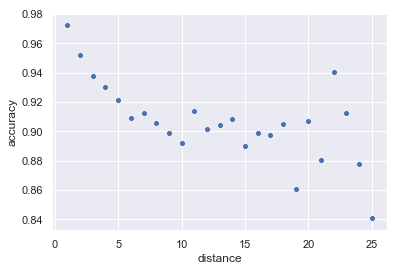

In [115]:
distance = results.groupby('distance')['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
distance = distance[distance['right'] == True]
distance = distance[distance['distance'] < 26]
distance = distance[distance['distance'] > 0]
sns.scatterplot(data=distance, x='distance', y='accuracy');

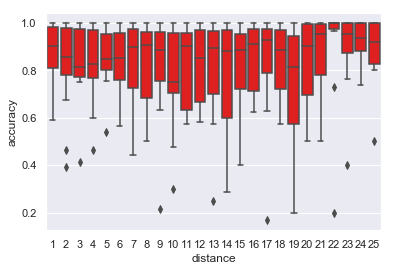

In [131]:
distance = results.groupby(['distance', 'language'])['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
distance = distance[distance['right'] == True]
distance = distance[distance['distance'] < 26]
distance = distance[distance['distance'] > 0]
sns.boxplot(data=distance, x='distance', y='accuracy', color='red');

# By distance and type

In [59]:
distance_type = results.groupby(['distance', 'type'])['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
distance_type = distance_type[distance_type['right'] == True]
distance_type = distance_type[distance_type['distance'] < 30]
# sns.scatterplot(data=distance_type[distance_type['type'] == 'verb'], x='distance', y='accuracy');
# sns.scatterplot(data=distance_type[distance_type['type'] == 'predicated'], x='distance', y='accuracy');
# sns.scatterplot(data=distance_type[distance_type['type'] == 'determiner'], x='distance', y='accuracy');
# sns.scatterplot(data=distance_type[distance_type['type'] == 'modifying'], x='distance', y='accuracy');

# By number of distractors

- Is BERT affected by distractors?
    - Yes, after a point.

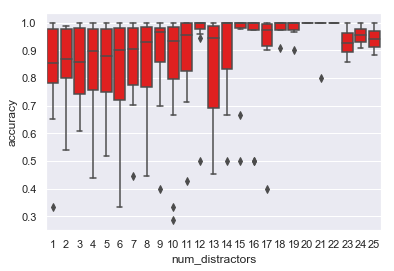

In [133]:
distractors = results.groupby(['num_distractors', 'language'])['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
distractors = distractors[distractors['right'] == True]
distractors = distractors[distractors['num_distractors'] < 26]
distractors = distractors[distractors['num_distractors'] > 0]
sns.boxplot(data=distractors, x='num_distractors', y='accuracy', color='red');

- English Determiner and Verb plots
- Single plot as a snapshot as boxplot
- Broken down by language and type
- Every language in supplementary material
- Write summary in results section

# Results for English

- Accuracy table for English verbs and determiners.

In [112]:
english = results.groupby(['num_distractors', 'language'])['right'].value_counts(normalize=True).to_frame(name='accuracy').reset_index()
english = english[english['language'] == 'eng']
english = english[english['right'] == True]
english = english[english['num_distractors'] < 10]
english.head(10)

,num_distractors,language,right,accuracy
12,0,eng,True,0.762082
37,1,eng,True,0.863095
63,2,eng,True,0.881497
88,3,eng,True,0.859362
113,4,eng,True,0.897313
138,5,eng,True,0.879397
163,6,eng,True,0.902622
186,7,eng,True,0.885542
209,8,eng,True,0.893130
231,9,eng,True,0.875598
